In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
df = pd.read_csv("../../Data/insurance.csv")

In [49]:
df_male = df[df.sex == "male"][['age','charges']]

In [50]:
z = np.abs(stats.zscore(df_male))
df_male= df_male[(z<3).all(axis=1)]

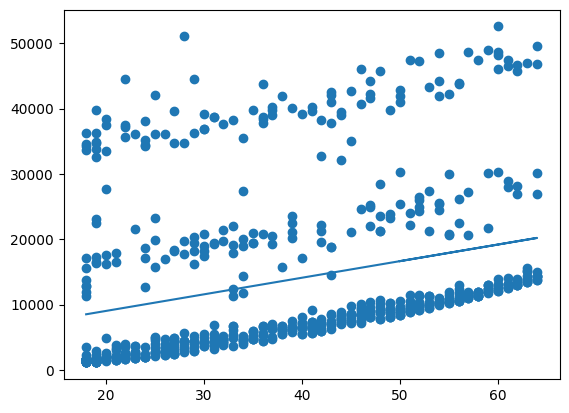

In [51]:
plt.scatter(df_male.age, df_male.charges)
slope, intecept = np.polyfit(df_male.age, df_male.charges, deg=1)
plt.plot(df_male.age, df_male.age*slope + intecept)
plt.show()

In [52]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [53]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df.sex = lbe.fit_transform(df.sex)
df.smoker = lbe.fit_transform(df.smoker)
df.region = lbe.fit_transform(df.region)


In [54]:
df = df[df.bmi >= 30].drop('bmi', axis=1)
df.head(10)

,age,sex,children,smoker,region,charges
1,18,1,1,0,2,1725.55230
2,28,1,3,0,2,4449.46200
6,46,0,1,0,2,8240.58960
12,23,1,0,0,3,1826.84300
13,56,0,0,0,2,11090.71780
14,27,1,0,1,2,39611.75770
16,52,0,1,0,0,10797.33620
18,56,1,0,0,3,10602.38500
19,30,1,0,1,3,36837.46700
20,60,0,0,0,0,13228.84695


In [55]:
X = df.drop('sex', axis=1)
y = df.sex

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
model = tree.DecisionTreeClassifier(criterion = 'entropy',
                                   random_state = 100,
                                   max_depth = 20,
                                   min_samples_leaf = 2)

In [107]:
model = model.fit(X_train, y_train)

In [108]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1
 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0
 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1]


In [109]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40 25]
 [23 54]]
              precision    recall  f1-score   support

           0       0.63      0.62      0.62        65
           1       0.68      0.70      0.69        77

    accuracy                           0.66       142
   macro avg       0.66      0.66      0.66       142
weighted avg       0.66      0.66      0.66       142



In [110]:
new_data = pd.DataFrame({'age':[20,18],'children':[2,3],'smoker':[1,0],'region':[0,3],'charges':[100.0,203.0]})
print(new_data)

   age  children  smoker  region  charges
0   20         2       1       0    100.0
1   18         3       0       3    203.0


In [111]:
print(model.predict(new_data))

[1 1]
